Maqsad qandli ayollar ortasida diabet bor yo'qligini taxmin qilish

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
data = pd.read_csv("C:/Users/Sanjar/Downloads/praktikum_datasets-main/diabetes.csv")
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
# data.shape
# data.size
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
data["Outcome"].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [5]:
corr = data.corr().abs()
corr.style.background_gradient(cmap="coolwarm")

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,0.081672,0.073535,0.017683,0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,0.113970,0.074752
Insulin,0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,0.113970,0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


kasallanish darajasiga eng katta bog'liqlik glucose, Age,pregnancies va BMI ustunlari ekan

In [6]:
data.corrwith(data["Outcome"]).abs().sort_values(ascending=False)

Outcome                     1.000000
Glucose                     0.466581
BMI                         0.292695
Age                         0.238356
Pregnancies                 0.221898
DiabetesPedigreeFunction    0.173844
Insulin                     0.130548
SkinThickness               0.074752
BloodPressure               0.065068
dtype: float64

In [7]:
col = ["DiabetesPedigreeFunction","Insulin","SkinThickness","BloodPressure"]
df = data.drop(col,axis=1)

In [8]:
X = df.drop("Outcome",axis=1).values
y = df["Outcome"]

In [9]:
from sklearn.preprocessing import StandardScaler
S_scaler = StandardScaler()

X = S_scaler.fit_transform(X)


In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=12)

In [47]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=21) # k-ni qiymati

knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=21)

eng yaxshi k qiymatni topish

In [48]:
y_predict = knn.predict(X_test)

In [49]:
from sklearn.metrics import jaccard_score
jaccard_score(y_test,y_predict)


0.546875

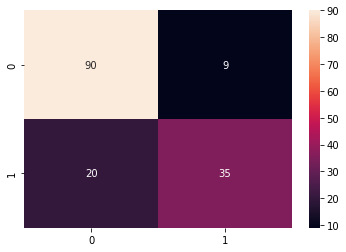

In [50]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(confusion_matrix(y_test,y_predict),annot=True)
plt.show()

In [51]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
precision = precision_score(y_test, y_predict)
recall = recall_score(y_test, y_predict)
f1 = f1_score(y_test, y_predict)
accuracy = accuracy_score(y_test, y_predict)
print(f"{precision=}\n{recall=}\n{f1=}\n{accuracy=}")

precision=0.7954545454545454
recall=0.6363636363636364
f1=0.7070707070707071
accuracy=0.8116883116883117


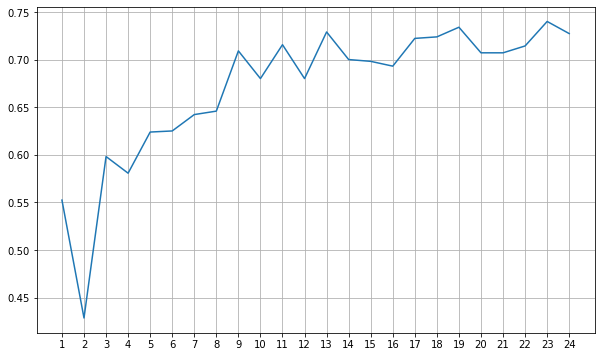

In [52]:
f1 = []
for k in range(1,25):
    knn = KNeighborsClassifier(n_neighbors=k) # k-ni qiymati
    knn.fit(X_train, y_train)
    y_predict = knn.predict(X_test)
    f1.append(f1_score(y_test, y_predict))

plt.figure(figsize=(10,6))
plt.plot(range(1,25),f1)
plt.xticks(range(1,25))
plt.grid()
plt.show()

In [53]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.83      0.92      0.87        99
           1       0.82      0.65      0.73        55

    accuracy                           0.82       154
   macro avg       0.82      0.79      0.80       154
weighted avg       0.82      0.82      0.82       154



In [54]:
from sklearn.model_selection import cross_val_predict
predict = cross_val_predict(estimator = knn, X = X, y = y, cv = 7)

from sklearn.metrics import classification_report
print("Classification Report: \n",classification_report(y, predict))

Classification Report: 
               precision    recall  f1-score   support

           0       0.78      0.88      0.83       500
           1       0.70      0.54      0.61       268

    accuracy                           0.76       768
   macro avg       0.74      0.71      0.72       768
weighted avg       0.75      0.76      0.75       768



In [55]:
from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors': np.arange(1, 25)}
knn_gscv = GridSearchCV(knn, param_grid, cv=7)

knn_gscv.fit(X, y)

GridSearchCV(cv=7, estimator=KNeighborsClassifier(n_neighbors=24),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])})

In [56]:
knn_gscv.cv_results_['rank_test_score']

array([23, 24, 22, 21, 17, 20, 18, 14, 15, 19, 10, 12, 16, 13,  9,  8,  6,
        4,  2,  3,  1,  5,  7, 10])

In [57]:
knn_gscv.best_params_

{'n_neighbors': 21}

In [58]:
knn_gscv.cv_results_

{'mean_fit_time': array([0.00114734, 0.00114243, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.00223238,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.00447369, 0.00112748, 0.00017677, 0.        ]),
 'std_fit_time': array([0.00281039, 0.00279838, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.0054682 ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.00707354, 0.00276175, 0.000433  , 0.        ]),
 'mean_score_time': array([0.00130524, 0.00343619, 0.00247897, 0.0044714 , 0.00223262,
        0.00223225, 0.00223187, 0.00446374, 0.00223197, 0.00224492,
        0.00223102, 0.00223184, 0.0045557 , 0.00223327, 0.00223248,
        0.        , 0.00446371, 0.00223204, 0.00446371, 0.0022319 ,
        0.      

In [59]:
knn_gscv.best_score_

0.7748600023829381

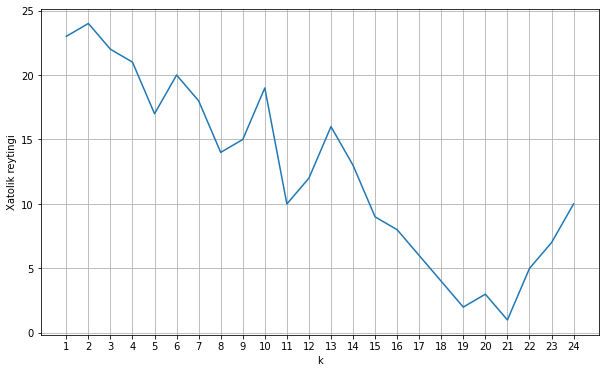

In [60]:
plt.figure(figsize=(10,6))
plt.plot(param_grid['n_neighbors'], knn_gscv.cv_results_['rank_test_score'])
plt.xticks(param_grid['n_neighbors'])
plt.xlabel("k")
plt.ylabel("Xatolik reytingi")
plt.grid()
plt.show()